In [20]:
import emoji
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline

In [29]:
robin = pd.read_excel(r'data-labeled/CryptoRobinhooders_chat_data_clean__.xlsx')
robin = robin.loc[:, ['Raw Data', 'Label']]

satoshi = pd.read_excel(r'data-labeled/Satoshi_club_chat_data_clean__.xlsx')
satoshi = satoshi.loc[:, ['Raw Data', 'Label']]

telegram_data = pd.read_csv('data-labeled/telegram_data_8th_NOV.csv', encoding='ISO-8859-1')
telegram_data = telegram_data.loc[:, ['text', 'Unnamed: 5']]
telegram_data.columns = ['Raw Data', 'Label']
telegram_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [30]:
robin.Label.value_counts()

Neutral     133
positive     70
negative      7
Name: Label, dtype: int64

In [31]:
satoshi.Label.value_counts()

positive     718
neutral      383
Neutral      185
negative     153
Positive     145
Negative      74
positive       7
 neutral       1
Name: Label, dtype: int64

In [32]:
telegram_data.Label.value_counts()

irrelevant    4049
positive      3458
neutral       3326
negative       710
Irrelevant     242
Positive       218
Neutral         84
Negative        12
Irrlevant       11
irrlevant        4
nue              4
posiitve         2
ne               1
Postive          1
Postiive         1
v                1
Name: Label, dtype: int64

In [33]:
satoshi['Label'] = satoshi['Label'].str.strip().str.lower()
satoshi.fillna('other', inplace=True)

In [34]:
robin['Label'] = robin['Label'].str.strip().str.lower()
robin.fillna('other', inplace=True)

In [35]:
telegram_data['Label'] = telegram_data['Label'].str.strip().str.lower()
telegram_data.fillna('other', inplace=True)
telegram_data['Label'] = telegram_data.Label.replace('nue', 'neutral')
telegram_data['Label'] = telegram_data.Label.replace('positiive', 'positive')
telegram_data['Label'] = telegram_data.Label.replace('irrlevant', 'irrelevant')
telegram_data['Label'] = telegram_data.Label.replace('postive', 'positive')
telegram_data['Label'] = telegram_data.Label.replace('postiive', 'positive')
telegram_data['Label'] = telegram_data.Label.replace('posiitve', 'positive')
telegram_data['Label'] = telegram_data.Label.replace('ne', 'neutral')
telegram_data = telegram_data[telegram_data['Label'] != 'v']
telegram_data['Label'] = telegram_data.Label.replace('irrelevant', 'other')

In [36]:
robin.columns, satoshi.columns, telegram_data.columns

(Index(['Raw Data', 'Label'], dtype='object'),
 Index(['Raw Data', 'Label'], dtype='object'),
 Index(['Raw Data', 'Label'], dtype='object'))

In [37]:
robin.shape, satoshi.shape, telegram_data.shape

((377, 2), (2832, 2), (12123, 2))

In [38]:
df = pd.concat([robin, satoshi, telegram_data], axis=0)
df.columns = ['raw_data', 'label']
df.reset_index(inplace=True, drop=True)
df.shape

(15332, 2)

In [39]:
df.label.value_counts()

other       5639
positive    4620
neutral     4117
negative     956
Name: label, dtype: int64

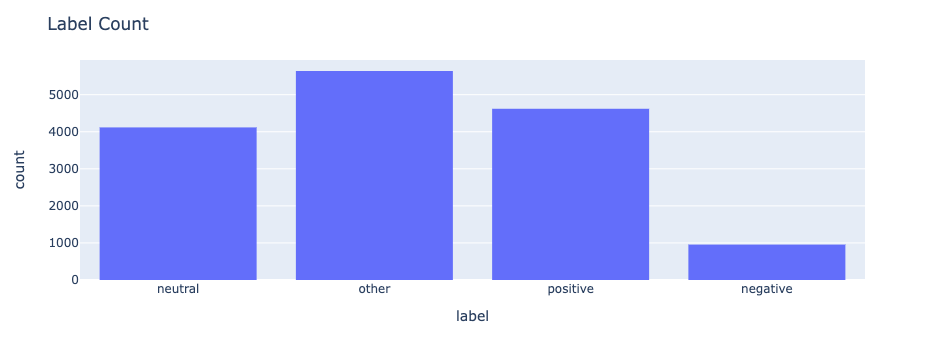

In [40]:
fig = px.histogram(df, x="label")
fig.update_layout(title_text='Label Count')
fig.show()

In [41]:
df.head()

,raw_data,label
0,**Welcome Sonika to CryptoRobinhooders🚀. \n\nF...,neutral
1,what is this mate?,neutral
2,What do you guys think about cryptoeats,neutral
3,#StripFinance - Enables #NFT owners to borrow ...,other
4,**JUST IN: **Facebook has chosen Coinbase as i...,other


In [42]:
def clean_data(df):

    df['clean'] = df['raw_data'].apply(lambda x: str(x).replace('\n', ' '))
    df['clean'] = df['clean'].str.replace(pat='(@\w+)', repl='', regex=True)
    df['clean'] = df['clean'].replace(to_replace=' +', value=' ', regex=True)
    
    # df['clean'] = df['raw_data'].astype(str).apply(lambda x: ' '.join([y for y in x.split() if len(y)<15]))
    df['clean'] = df['clean'].astype(str).str.replace(r"""[#*+\\\(\)_!:\-\[\]<>']""", '', regex=True)
    df['clean'] = df['clean'].astype(str).str.replace(r"""(\.{2,})""", '.', regex=True)
    df['clean'] = df['clean'].astype(str).str.replace(r"""[-a-zA-Z0-9@:%_\+.~#?&//=]{2,256}\.[a-z]{2,4}\b(\/[-a-zA-Z0-9@:%_\+.~#?&//=]*)?""", '<<<URL>>>', regex=True)
    df['clean'] = df['clean'].astype(str).str.replace(r"""\$(\d+\.?,?)+""", '<<<AMOUNT>>>', regex=True)
    df['clean'] = df['clean'].astype(str).str.replace(r"""(\d+%)""", '<<<PERCENTAGE>>>', regex=True)
    df['clean'] = df['clean'].apply(lambda x: emoji.demojize(x, delimiters=(" ___", "___ ")))
    df['clean'] = df['clean'].astype(str).str.replace(r'[\',\?\(\)!@#$\+-\.\/\^*~|\{\}=\d/]+', '', regex=True)
    df['word_count'] = df['clean'].apply(lambda x: len(str(x).split()))
    df = df[df['word_count'] > 2]
    df['clean'] = df['clean'].str.lower()
    df = df.loc[:, ['raw_data', 'clean', 'label']]
    
    return df

In [43]:
df = clean_data(df)
df.to_excel(r'data-labeled/combined-super-clean-data.xlsx', index=False)

/var/folders/2c/20w7d9vd7j3dtcqrsx02ml4r9h83hx/T/ipykernel_13299/1248036905.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
telegram_data.columns = ['raw_data', 'label']
telegram_data = clean_data(telegram_data)
telegram_data.to_excel(r'data-labeled/telegram-clean-data.xlsx', index=False)

/var/folders/2c/20w7d9vd7j3dtcqrsx02ml4r9h83hx/T/ipykernel_13299/1248036905.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

